#### Load Librabries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import geopandas as gpd

## Loading and Cleaning the BLS data.

1. Load the Data 

In [4]:
# Load the data using pandas
bls_data=pd.read_excel("./Ressources/all_data_M_2023.xlsx")
# Preview the first few rows to check if the data is being read correctly
display(bls_data.head(3))

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
0,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,13.97,17.14,23.11,37.01,58.4,29050,35660,48060,76980,121470
1,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,26.23,37.66,56.19,81.29,111.36,54550,78330,116880,169090,231620
2,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1000,Top Executives,...,22.31,31.81,49.74,79.57,#,46400,66170,103460,165500,#


In [5]:
# check the columns names:
bls_data.columns

Index(['AREA', 'AREA_TITLE', 'AREA_TYPE', 'PRIM_STATE', 'NAICS', 'NAICS_TITLE',
       'I_GROUP', 'OWN_CODE', 'OCC_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP',
       'EMP_PRSE', 'PCT_TOTAL', 'PCT_RPT', 'H_MEAN', 'A_MEAN', 'MEAN_PRSE',
       'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90', 'A_PCT10',
       'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90'],
      dtype='object')

2.  Clean the BLS Data

In [6]:
# Select the relevant columns from your DataFrame
relevant_columns = [
    'AREA', 'AREA_TITLE', 'NAICS_TITLE', 
    'OCC_CODE', 'OCC_TITLE', 'TOT_EMP', 'PRIM_STATE',
    'H_MEAN', 'A_MEAN', 'H_MEDIAN', 'A_MEDIAN',
    'H_PCT75', 'A_PCT75', 'H_PCT90', 'A_PCT90'
]
# Subset the DataFrame 
bls_df = bls_data[relevant_columns]
bls_df.head()

,AREA,AREA_TITLE,NAICS_TITLE,OCC_CODE,OCC_TITLE,TOT_EMP,PRIM_STATE,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,H_PCT75,A_PCT75,H_PCT90,A_PCT90
0,99,U.S.,Cross-industry,00-0000,All Occupations,151853870,US,31.48,65470,23.11,48060,37.01,76980,58.4,121470
1,99,U.S.,Cross-industry,11-0000,Management Occupations,10495770,US,66.23,137750,56.19,116880,81.29,169090,111.36,231620
2,99,U.S.,Cross-industry,11-1000,Top Executives,3751510,US,65.43,136100,49.74,103460,79.57,165500,#,#
3,99,U.S.,Cross-industry,11-1010,Chief Executives,211230,US,124.47,258900,99.37,206680,#,#,#,#
4,99,U.S.,Cross-industry,11-1011,Chief Executives,211230,US,124.47,258900,99.37,206680,#,#,#,#


In [7]:
#check the dtypes of the df
bls_df.dtypes

AREA            int64
AREA_TITLE     object
NAICS_TITLE    object
OCC_CODE       object
OCC_TITLE      object
TOT_EMP        object
PRIM_STATE     object
H_MEAN         object
A_MEAN         object
H_MEDIAN       object
A_MEDIAN       object
H_PCT75        object
A_PCT75        object
H_PCT90        object
A_PCT90        object
dtype: object

In [14]:
# Convert numeric columns to appropriate types (handle errors in conversion)
numeric_columns = ['TOT_EMP', 'H_MEAN', 'A_MEAN', 'H_MEDIAN', 'A_MEDIAN', 'H_PCT75', 'A_PCT75', 'H_PCT90', 'A_PCT90']
# Convert specified columns to numeric, handling errors with 'coerce'
bls_df[numeric_columns] = bls_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Preview the cleaned data
bls_df.head()


C:\Users\marwa\AppData\Local\Temp\ipykernel_19356\4284911407.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bls_df[numeric_columns] = bls_df[numeric_columns].apply(pd.to_numeric, errors='coerce')


,AREA,AREA_TITLE,NAICS_TITLE,OCC_CODE,OCC_TITLE,TOT_EMP,PRIM_STATE,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,H_PCT75,A_PCT75,H_PCT90,A_PCT90
0,99,U.S.,Cross-industry,00-0000,All Occupations,151853870.0,US,31.48,65470.0,23.11,48060.0,37.01,76980.0,58.40,121470.0
1,99,U.S.,Cross-industry,11-0000,Management Occupations,10495770.0,US,66.23,137750.0,56.19,116880.0,81.29,169090.0,111.36,231620.0
2,99,U.S.,Cross-industry,11-1000,Top Executives,3751510.0,US,65.43,136100.0,49.74,103460.0,79.57,165500.0,NaN,NaN
3,99,U.S.,Cross-industry,11-1010,Chief Executives,211230.0,US,124.47,258900.0,99.37,206680.0,NaN,NaN,NaN,NaN
4,99,U.S.,Cross-industry,11-1011,Chief Executives,211230.0,US,124.47,258900.0,99.37,206680.0,NaN,NaN,NaN,NaN


In [15]:
#recheck the data type
bls_df.dtypes

AREA             int64
AREA_TITLE      object
NAICS_TITLE     object
OCC_CODE        object
OCC_TITLE       object
TOT_EMP        float64
PRIM_STATE      object
H_MEAN         float64
A_MEAN         float64
H_MEDIAN       float64
A_MEDIAN       float64
H_PCT75        float64
A_PCT75        float64
H_PCT90        float64
A_PCT90        float64
dtype: object

In [16]:
#  Ensure that AREA_TITLE, , NAICS_TITLE, and OCC_TITLE have consistent formatting 
#str.strip to Remove leading/trailing spaces and str.title to standardize case
bls_df.loc[:,'AREA_TITLE'] = bls_df['AREA_TITLE'].str.strip().str.title()#strip spaces and standardize text formatting 
bls_df.loc[:,'OCC_TITLE'] = bls_df['OCC_TITLE'].str.strip().str.title()
bls_df.loc[:,'NAICS_TITLE'] = bls_df['NAICS_TITLE'].str.strip()

In [17]:
# Remove hyphen and the invalid code from the OCC_CODE column
bls_df.loc[:,'OCC_CODE'] = bls_df['OCC_CODE'].str.replace('-', '', regex=False).str.replace(r'000000', '', regex=True).replace('', np.nan).dropna()

In [18]:
# Get the unique values for each column in the DataFrame
unique_values = bls_df.apply(lambda x: x.unique())

# Display the unique values for each column
print(unique_values)

AREA           [99, 1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, ...
AREA_TITLE     [U.S., Alabama, Alaska, Arizona, Arkansas, Cal...
NAICS_TITLE    [Cross-industry, Cross-industry, Private Owner...
OCC_CODE       [nan, 110000, 111000, 111010, 111011, 111020, ...
OCC_TITLE      [All Occupations, Management Occupations, Top ...
TOT_EMP        [151853870.0, 10495770.0, 3751510.0, 211230.0,...
PRIM_STATE     [US, AL, AK, AZ, AR, CA, CO, CT, DE, DC, FL, G...
H_MEAN         [31.48, 66.23, 65.43, 124.47, 62.18, nan, 76.9...
A_MEAN         [65470.0, 137750.0, 136100.0, 258900.0, 129330...
H_MEDIAN       [23.11, 56.19, 49.74, 99.37, 48.69, nan, 67.23...
A_MEDIAN       [48060.0, 116880.0, 103460.0, 206680.0, 101280...
H_PCT75        [37.01, 81.29, 79.57, nan, 77.06, 96.15, 90.64...
A_PCT75        [76980.0, 169090.0, 165500.0, nan, 160290.0, 8...
H_PCT90        [58.4, 111.36, nan, 111.59, 102.27, 86.41, 90....
A_PCT90        [121470.0, 231620.0, nan, 232110.0, 129510.0, ...
dtype: object


In [19]:
#check and count the missing values
missing_values=bls_df.isna().sum()
missing_values

AREA               0
AREA_TITLE         0
NAICS_TITLE        0
OCC_CODE        1036
OCC_TITLE          0
TOT_EMP        11598
PRIM_STATE         0
H_MEAN         20964
A_MEAN          5352
H_MEDIAN       23059
A_MEDIAN        7474
H_PCT75        26119
A_PCT75        10606
H_PCT90        33008
A_PCT90        17844
dtype: int64

In [20]:
#drop all the missing values from  the data
bls_df=bls_df.dropna(how='any')
# check all the remove values
bls_df.shape
# bls_df.isna().sum()

(368220, 15)

In [21]:
bls_df['PRIM_STATE'].unique()

array(['US', 'AL', 'AK', 'AZ', 'AR', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN',
       'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MS', 'MO', 'MT',
       'NE', 'NV', 'NH', 'NM', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI',
       'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'WV', 'WI', 'WY', 'DC', 'MA',
       'CT', 'CO', 'DE', 'NJ', 'VA', 'WA', 'CA', 'NY', 'GU', 'PR', 'VI'],
      dtype=object)

In [22]:
# ensure to keep only the 50 us state while excluding the others 
unwanted_state=['GU','PR','VI','DC']
bls_clean=bls_df[~bls_df['PRIM_STATE'].isin(unwanted_state)]
bls_clean['PRIM_STATE'].unique()

array(['US', 'AL', 'AK', 'AZ', 'AR', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN',
       'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MS', 'MO', 'MT',
       'NE', 'NV', 'NH', 'NM', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI',
       'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'WV', 'WI', 'WY', 'MA', 'CT',
       'CO', 'DE', 'NJ', 'VA', 'WA', 'CA', 'NY'], dtype=object)

In [23]:
# filter dataset to include only rows where the annual mean wage (A_MEAN) or hourly wage (H_MEAN) exceeds the equivalent of $100K per year.
bls_clean = bls_clean[(bls_clean['A_MEAN'] >= 100000) | (bls_clean['H_MEAN'] >= 48.08)]
bls_clean.tail(2)

,AREA,AREA_TITLE,NAICS_TITLE,OCC_CODE,OCC_TITLE,TOT_EMP,PRIM_STATE,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,H_PCT75,A_PCT75,H_PCT90,A_PCT90
412118,2200006,Southwest Louisiana Nonmetropolitan Area,Cross-industry,535031,Ship Engineers,90.0,LA,54.82,114020.0,52.71,109630.0,70.10,145810.0,82.05,170660.0
412119,2800004,Southwest Mississippi Nonmetropolitan Area,Cross-industry,535031,Ship Engineers,40.0,MS,55.86,116200.0,61.22,127330.0,61.66,128240.0,61.66,128240.0


 
### National Data Representation: 
We noticed that the national-level data is identified under the PRIM_STATE column as 'US', and the AREA_TITLE typically mentions 'U.S.' to indicate that the row represents data aggregated for the entire U.S. rather than a specific state.

* State-Level Data: All other rows represent state-specific data, where the PRIM_STATE column corresponds to the state abbreviation (like 'CA' for California, 'TX' for Texas, etc.).both national and state-level data for the flexibility of analysis. 

we can use national data for comparison while primarily focusing on state-specific data, which gives a fuller picture of the job market

In [24]:
# Create a new column 'LEVEL' to tag national data based on 'PRIM_STATE' and 'AREA_TITLE'
bls_clean.loc[:,'LEVEL'] = bls_clean.apply(
    lambda row: 'National' if row['PRIM_STATE'] == 'US' and 'U.S.' in row['AREA_TITLE'] else 'State', 
    axis=1
)

# Preview to check the tagging
bls_clean[['PRIM_STATE', 'AREA_TITLE', 'LEVEL']].head()


,PRIM_STATE,AREA_TITLE,LEVEL
1,US,U.S.,National
5,US,U.S.,National
6,US,U.S.,National
17,US,U.S.,National
19,US,U.S.,National


- Data Integrity: 
By tagging the national and state data explicitly, we ensure that the national-level data is treated separately, avoiding issues when conducting state-level analyses or visualizations.

In [25]:
# Isolate state-level data and national-level analysis for comparison.
state_data = bls_clean[bls_clean['LEVEL'] == 'State']
National_data=bls_clean[bls_clean['LEVEL']=='National']
display(state_data.head())
display(National_data.head())

,AREA,AREA_TITLE,NAICS_TITLE,OCC_CODE,OCC_TITLE,TOT_EMP,PRIM_STATE,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,H_PCT75,A_PCT75,H_PCT90,A_PCT90,LEVEL
177552,1,Alabama,Cross-industry,110000,Management Occupations,105580.0,AL,56.21,116920.0,47.95,99740.0,67.22,139810.0,95.44,198520.0,State
177553,2,Alaska,Cross-industry,110000,Management Occupations,23750.0,AK,59.74,124260.0,52.25,108680.0,70.07,145750.0,94.35,196260.0,State
177554,4,Arizona,Cross-industry,110000,Management Occupations,232000.0,AZ,59.53,123820.0,49.31,102560.0,74.48,154920.0,100.99,210050.0,State
177561,12,Florida,Cross-industry,110000,Management Occupations,601150.0,FL,62.44,129870.0,50.08,104170.0,76.94,160020.0,106.36,221240.0,State
177562,13,Georgia,Cross-industry,110000,Management Occupations,304430.0,GA,64.69,134550.0,53.30,110870.0,80.07,166550.0,107.70,224010.0,State


,AREA,AREA_TITLE,NAICS_TITLE,OCC_CODE,OCC_TITLE,TOT_EMP,PRIM_STATE,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,H_PCT75,A_PCT75,H_PCT90,A_PCT90,LEVEL
1,99,U.S.,Cross-industry,110000,Management Occupations,10495770.0,US,66.23,137750.0,56.19,116880.0,81.29,169090.0,111.36,231620.0,National
5,99,U.S.,Cross-industry,111020,General And Operations Managers,3507810.0,US,62.18,129330.0,48.69,101280.0,77.06,160290.0,111.59,232110.0,National
6,99,U.S.,Cross-industry,111021,General And Operations Managers,3507810.0,US,62.18,129330.0,48.69,101280.0,77.06,160290.0,111.59,232110.0,National
17,99,U.S.,Cross-industry,112033,Fundraising Managers,31810.0,US,64.24,133620.0,57.31,119200.0,78.20,162660.0,102.27,212730.0,National
19,99,U.S.,Cross-industry,113010,Administrative Services And Facilities Managers,373920.0,US,56.56,117650.0,50.44,104900.0,66.45,138220.0,86.41,179730.0,National


### Data Visualizations

In [26]:
# Summary statistics for numerical columns
bls_clean.describe()


,AREA,TOT_EMP,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,H_PCT75,A_PCT75,H_PCT90,A_PCT90
count,4.250400e+04,4.250400e+04,42504.000000,42504.000000,42504.000000,42504.000000,42504.000000,42504.000000,42504.000000,42504.000000
mean,2.288428e+05,1.017942e+04,58.354339,121375.926972,54.739112,113856.371871,69.103606,143734.548748,84.899941,176590.830275
std,8.946662e+05,1.276717e+05,8.179135,17012.641437,9.424484,19602.943454,10.373709,21577.287499,13.571549,28228.787283
min,1.000000e+00,3.000000e+01,48.080000,100000.000000,16.370000,34050.000000,31.610000,65760.000000,36.060000,75000.000000
25%,9.900000e+01,1.100000e+02,51.760000,107660.000000,48.320000,100500.000000,61.590000,128120.000000,75.520000,157070.000000
50%,9.900000e+01,3.700000e+02,56.570000,117670.000000,52.310000,108800.000000,66.380000,138075.000000,82.790000,172200.000000
75%,2.982000e+04,1.930000e+03,63.130000,131310.000000,60.820000,126500.000000,76.340000,158780.000000,95.720000,199090.000000
max,5.600007e+06,1.049577e+07,158.410000,329490.000000,111.220000,231330.000000,114.860000,238900.000000,114.990000,239180.000000


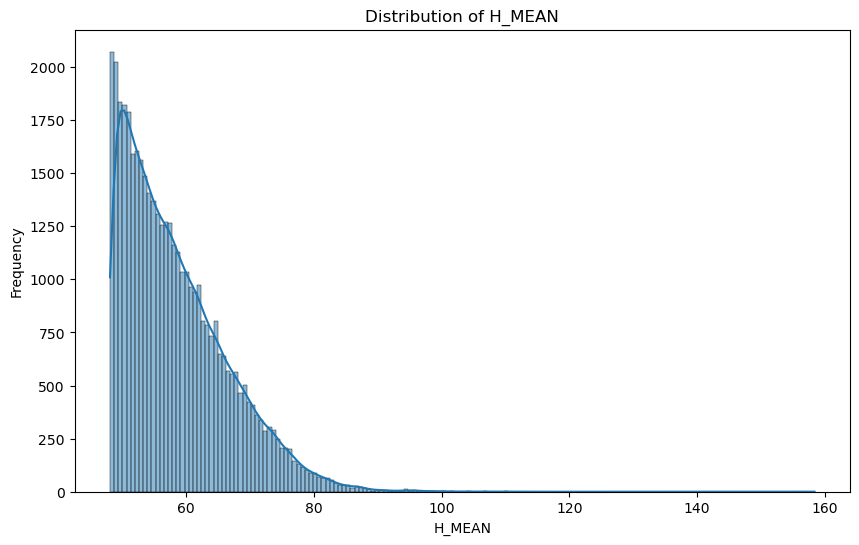

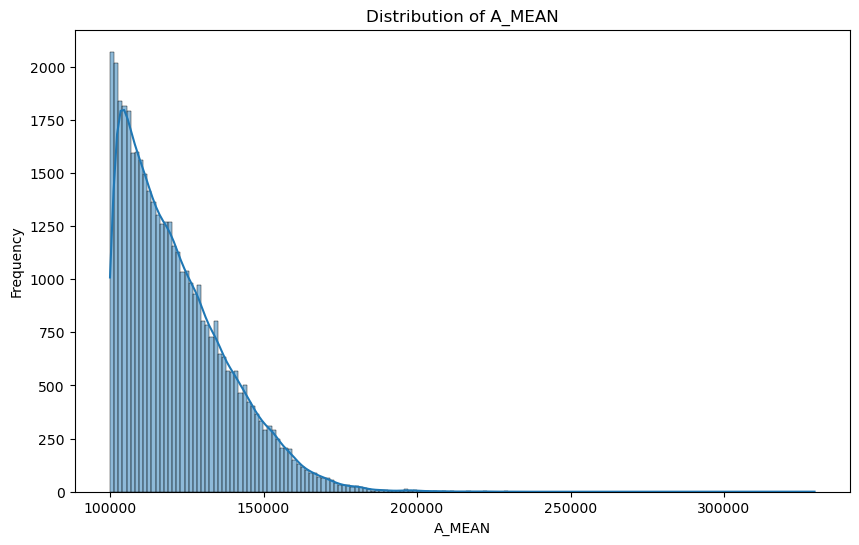

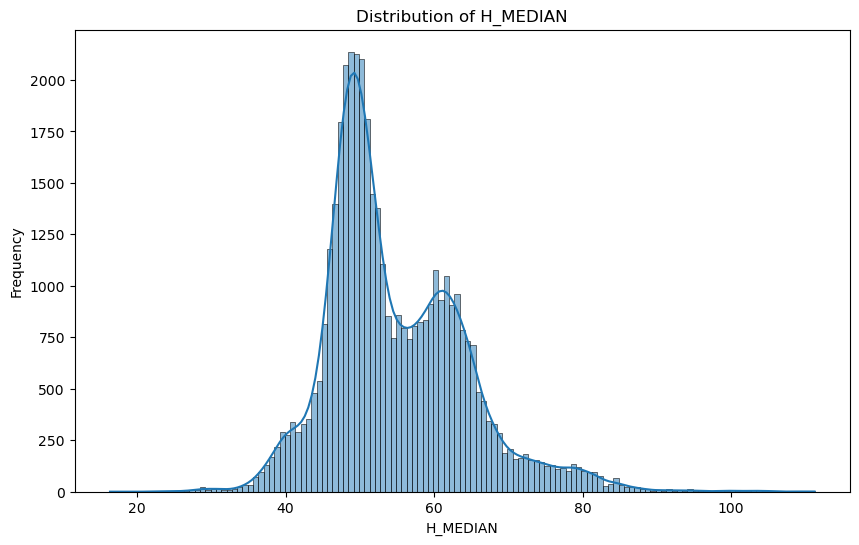

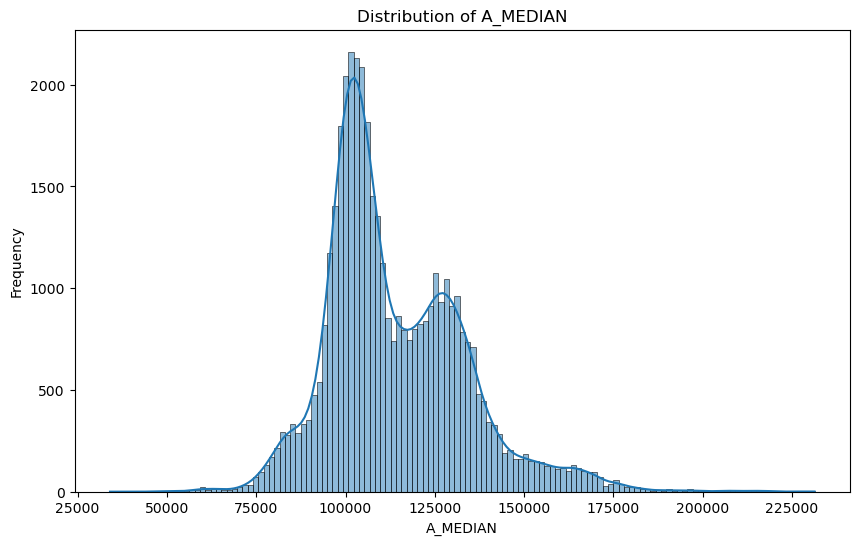

In [27]:

# Plotting histograms for numerical columns
columns_to_plot = ['H_MEAN', 'A_MEAN', 'H_MEDIAN', 'A_MEDIAN']
for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(bls_clean[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


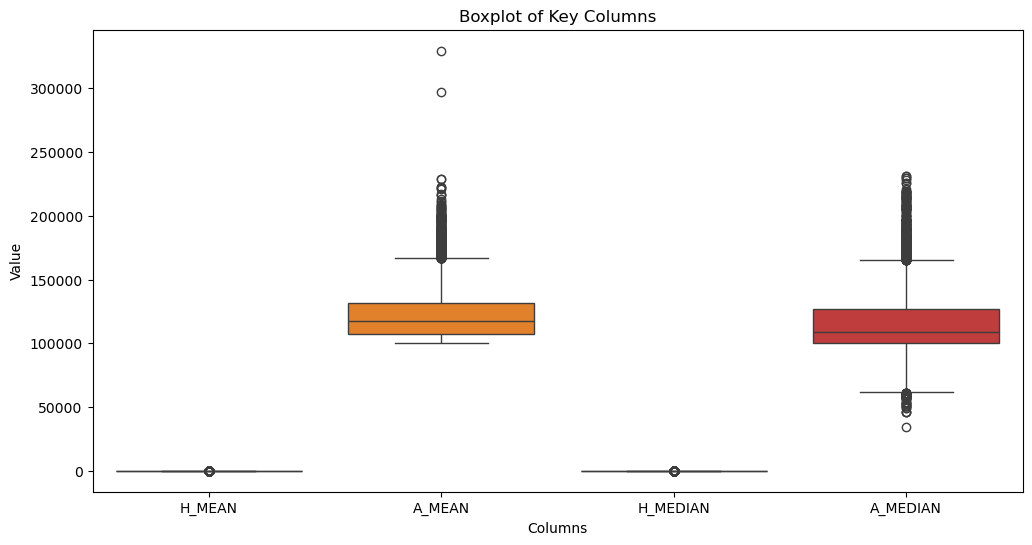

In [28]:
# Boxplot for a few key columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=bls_clean[columns_to_plot])
plt.title('Boxplot of Key Columns')
plt.xlabel('Columns')
plt.ylabel('Value')
plt.show()
# Boxplots help to visualize the spread and potential outliers in the data.

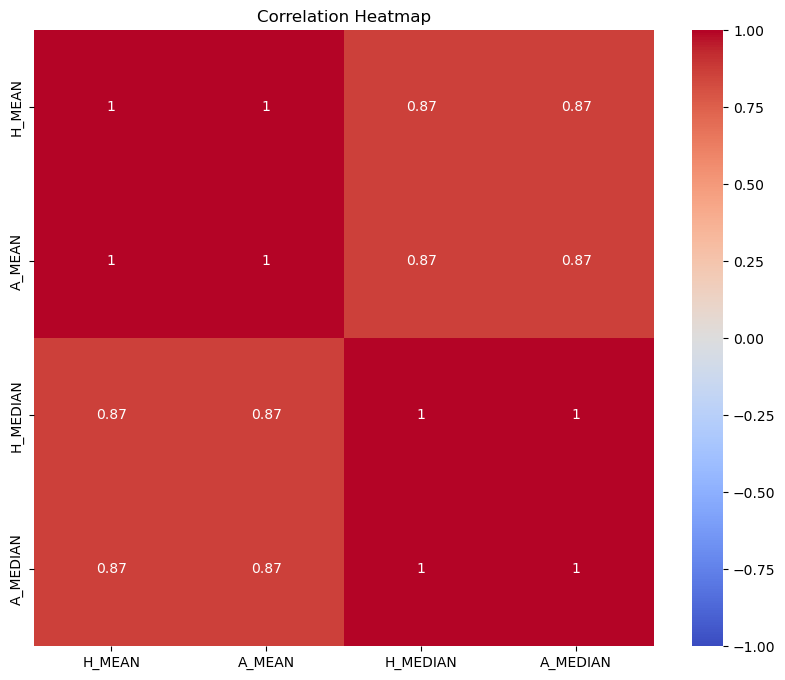

In [29]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
corr = bls_clean[columns_to_plot].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()
# visualize correlations between numeric features.


Interpretation:
- High Correlation (Near 1): If the correlation between variables is very close to 1, this suggests that the two variables are almost identical or provide redundant information. This could be problematic in models where multicollinearity can skew results.

- Moderate Correlation (0.87): This is still a strong correlation, but not perfect. While the variables are closely related, there's still some unique information in each, which might be valuable.

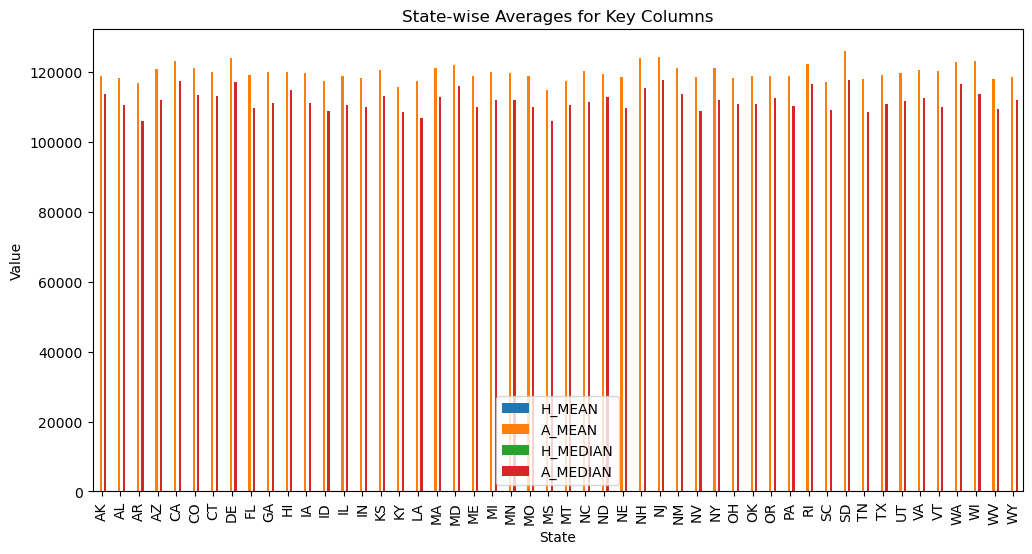

In [30]:
# Group by state and calculate the mean for the key columns
state_agg = state_data.groupby('PRIM_STATE')[columns_to_plot].mean()

# Plot the state-wise averages
state_agg.plot(kind='bar',figsize=(12, 6))
plt.title('State-wise Averages for Key Columns')
plt.xlabel('State')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()


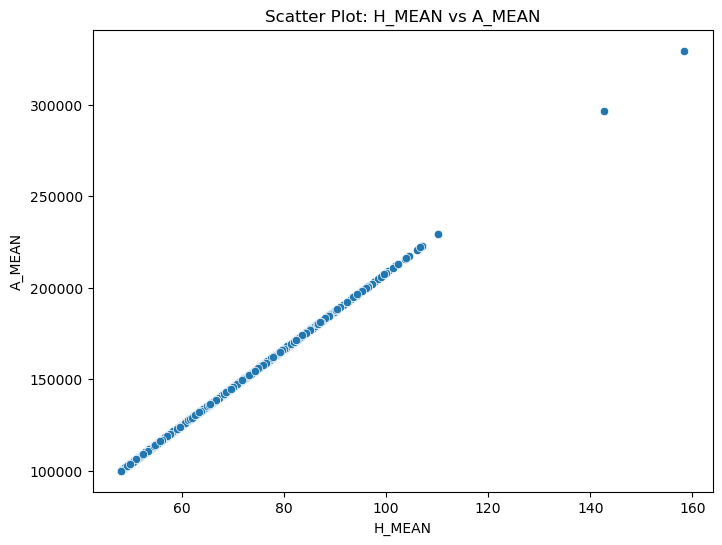

In [31]:
# Scatter plot between highly correlated features (example: H_MEAN vs A_MEAN)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=bls_clean['H_MEAN'], y=bls_clean['A_MEAN'])
plt.title('Scatter Plot: H_MEAN vs A_MEAN')
plt.xlabel('H_MEAN')
plt.ylabel('A_MEAN')
plt.show()


### Load educational Attainment data

In [32]:
#load data
CENSUS_data = pd.read_csv("./Ressources/usa_00008.csv",delimiter=',')
# check data
CENSUS_data.head()

,REGION,STATEICP,SEX,AGE,EDUC,EDUCD,GRADEATT,GRADEATTD,DEGFIELD,DEGFIELDD,...,QINCOTHE,QINCRETI,QINCSS,QINCTOT,QINCWAGE,QINCWELF,QPWSTAT2,US2022C_WAGP,US2022C_OCCP,US2022C_POWSP
0,32,41,1,41,6,63,0,0,0,0,...,0,0,0,0,0,0,0,24000,7330,1
1,32,41,1,21,7,71,0,0,0,0,...,0,0,0,0,0,0,0,29000,3870,1
2,32,41,2,19,7,71,6,60,0,0,...,4,4,4,4,4,4,4,4500,5400,1
3,32,41,2,51,8,81,0,0,0,0,...,0,0,0,0,0,0,4,30000,5840,1
4,32,41,1,20,6,65,6,60,0,0,...,4,4,4,4,4,4,4,17000,4020,1


In [33]:
CENSUS_data.columns

Index(['REGION', 'STATEICP', 'SEX', 'AGE', 'EDUC', 'EDUCD', 'GRADEATT',
       'GRADEATTD', 'DEGFIELD', 'DEGFIELDD', 'EMPSTAT', 'EMPSTATD', 'OCC',
       'OCCSOC', 'IND', 'INDNAICS', 'INCTOT', 'INCWAGE', 'OCCSCORE',
       'PWSTATE2', 'QAGE', 'QSEX', 'QEDUC', 'QGRADEAT', 'QDEGFIELD',
       'QEMPSTAT', 'QIND', 'QOCC', 'QINCBUS', 'QINCINVS', 'QINCOTHE',
       'QINCRETI', 'QINCSS', 'QINCTOT', 'QINCWAGE', 'QINCWELF', 'QPWSTAT2',
       'US2022C_WAGP', 'US2022C_OCCP', 'US2022C_POWSP'],
      dtype='object')

In [34]:
# filtre the data  to only keep the relevant columns
relevant_c = ['REGION','STATEICP' ,'US2022C_POWSP','OCC','OCCSOC', 'INCTOT', 'INCWAGE', 'EDUCD','SEX', 'AGE']
CENSUS_data=CENSUS_data[relevant_c]
CENSUS_data.head()

,REGION,STATEICP,US2022C_POWSP,OCC,OCCSOC,INCTOT,INCWAGE,EDUCD,SEX,AGE
0,32,41,1,7330,49904X,28057,28057,63,1,41
1,32,41,1,3870,333050,33903,33903,71,1,21
2,32,41,1,5400,434171,5261,5261,71,2,19
3,32,41,1,5840,439041,35072,35072,81,2,51
4,32,41,1,4020,352010,19874,19874,65,1,20


In [41]:
# CENSUS_data["OCCSOC"].unique()

In [35]:
# Remove any non-numeric characters and ensure all codes are exactly 6 digits by padding with leading zeros
CENSUS_data.loc[:, 'OCCSOC'] = CENSUS_data['OCCSOC'].str.extract('(\d+)', expand=False).str.zfill(6)

In [36]:
#Replace all occurrences of 1 with "Male" and 2 with "Female" in the SEX column.#
CENSUS_data.loc[:,'SEX'] = CENSUS_data['SEX'].astype(str).replace({'1': 'Male', '2': 'Female'})

C:\Users\marwa\AppData\Local\Temp\ipykernel_19356\2677652218.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Male' 'Male' 'Female' ... 'Female' 'Male' 'Female']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  CENSUS_data.loc[:,'SEX'] = CENSUS_data['SEX'].astype(str).replace({'1': 'Male', '2': 'Female'})


In [37]:
CENSUS_data.head()

,REGION,STATEICP,US2022C_POWSP,OCC,OCCSOC,INCTOT,INCWAGE,EDUCD,SEX,AGE
0,32,41,1,7330,049904,28057,28057,63,Male,41
1,32,41,1,3870,333050,33903,33903,71,Male,21
2,32,41,1,5400,434171,5261,5261,71,Female,19
3,32,41,1,5840,439041,35072,35072,81,Female,51
4,32,41,1,4020,352010,19874,19874,65,Male,20


In [67]:
Educ_df['STATEICP'].unique()

array([41, 81, 61, 42, 71, 62,  1, 11, 98, 43, 44, 82, 63, 21, 22, 31, 32,
       51, 45,  2, 52,  3, 23, 33, 46, 34, 64, 35, 65,  4, 12, 66, 13, 47,
       36, 24, 53, 72, 14,  5, 48, 37, 54, 49, 67,  6, 40, 73, 56, 25, 68],
      dtype=int64)

In [38]:
# Mapping of numeric state codes to their respective state abbreviations
CENSUS_DF=CENSUS_data.copy()
state_code_to_abbr = {
    98: 'US', 1: 'CT',2: 'ME', 3: 'MA',4: 'NH', 5: 'RI', 6: 'VT',11: 'DE', 12: 'NJ', 13: 'NY',14: 'PA', 21: 'IL',22: 'IN', 23: 'MI', 24: 'OH', 
    25: 'WI', 31: 'IA',32: 'KS',33: 'MN',34: 'MO', 35: 'NE',36: 'ND',37: 'SD',40: 'VA', 41: 'AL',42: 'AR', 43: 'FL',
    44: 'GA',45: 'LA',46: 'MS',47: 'NC',48: 'SC',49: 'TX', 51: 'KY', 52: 'MD', 53: 'OK', 54: 'TN', 56: 'WV', 61: 'AZ',               
    62: 'CO',63: 'ID', 64: 'MT', 65: 'NV', 66: 'NM', 67: 'UT', 68: 'WY', 71: 'CA', 72: 'OR', 73: 'WA', 81: 'AK', 82: 'HI'
}

# apply the map on the Data
CENSUS_DF.loc[:,'STATE_ABBR']=CENSUS_DF['STATEICP'].map(state_code_to_abbr)

In [48]:
# Dictionary to map STATEICP codes to state names (50 U.S. states only)
state_map = {
    98:'United States',1: 'Connecticut', 2: 'Maine',3: 'Massachusetts',4: 'New Hampshire',5: 'Rhode Island',6: 'Vermont',
    11: 'Delaware',12: 'New Jersey',13: 'New York',14: 'Pennsylvania',21: 'Illinois',22: 'Indiana',23: 'Michigan',24: 'Ohio',25: 'Wisconsin',
    31: 'Iowa',32: 'Kansas',33: 'Minnesota',34: 'Missouri',35: 'Nebraska',36: 'North Dakota',37: 'South Dakota',40: 'Virginia',41: 'Alabama',
    42: 'Arkansas',43: 'Florida',44: 'Georgia',45: 'Louisiana',46: 'Mississippi',47: 'North Carolina',48: 'South Carolina',9: 'Texas',
    51: 'Kentucky',52: 'Maryland',53: 'Oklahoma',54: 'Tennessee',56: 'West Virginia',61: 'Arizona',62: 'Colorado',63: 'Idaho',64: 'Montana',65: 'Nevada',
    66: 'New Mexico',67: 'Utah',68: 'Wyoming', 71: 'California',72: 'Oregon',73: 'Washington',81: 'Alaska', 82: 'Hawaii'
}
# apply the map on the Data
CENSUS_DF.loc[:,'STATE_NAME']=CENSUS_DF['STATEICP'].map(state_map)


In [29]:
CENSUS_DF['EDUCD'].unique()

array([ 63,  71,  81,  65, 101,  40,  64,  50,  30,  17,  61,  16, 114,
       116, 115,  25,  26,  22,  23,  11,  15,  14], dtype=int64)

In [40]:
# Education map for the provided codes
education_map = {
    63: "No schooling", 
    71: "Nursery to grade 4", 
    81: "Kindergarten", 
    65: "Grade 1 to 4", 
    101: "Grade 5 to 8", 
    40: "Grade 9", 
    64: "Grade 10", 
    50: "Grade 11", 
    30: "Grade 12, no diploma", 
    17: "High school graduate", 
    61: "Some college", 
    16: "1 year of college", 
    114: "Associate's degree", 
    116: "Bachelor's degree", 
    115: "Master's degree", 
    25: "Professional degree", 
    26: "Doctoral degree", 
    22: "Missing"
}

# Add missing education code (if known, or add as "Unknown")
# education_map[23] = "Some High School"  # Example mapping for code 23

# Apply the mapping again
CENSUS_DF['EDUCATION_LABEL'] = CENSUS_DF['EDUCD'].map(education_map)

In [41]:
#
CENSUS_DF.head()

,REGION,STATEICP,US2022C_POWSP,OCC,OCCSOC,INCTOT,INCWAGE,EDUCD,SEX,AGE,STATE_ABBR,STATE_NAME,EDUCATION_LABEL
0,32,41,1,7330,049904,28057,28057,63,Male,41,AL,Alabama,No schooling
1,32,41,1,3870,333050,33903,33903,71,Male,21,AL,Alabama,Nursery to grade 4
2,32,41,1,5400,434171,5261,5261,71,Female,19,AL,Alabama,Nursery to grade 4
3,32,41,1,5840,439041,35072,35072,81,Female,51,AL,Alabama,Kindergarten
4,32,41,1,4020,352010,19874,19874,65,Male,20,AL,Alabama,Grade 1 to 4


In [ ]:
# ccheck for nullvalue and droped
# CENSUS_DF.isna().sum()
#Drop missing valeus
CENSUS_DF=CENSUS_DF.dropna(how='any')


In [43]:
# Filter for individuals earning $100K or more
CENSUS_DF = CENSUS_DF[CENSUS_DF['INCTOT'] >= 100000]

In [47]:
CENSUS_DF['STATE_NAME'].value_counts()

STATE_NAME
California        211617
New York           99708
Florida            69242
New Jersey         60199
Illinois           57874
Pennsylvania       49092
Massachusetts      47855
Virginia           46558
Washington         43792
Ohio               38608
Georgia            38070
Maryland           37153
North Carolina     35754
Michigan           33666
Colorado           31541
Arizona            25145
Connecticut        23133
Minnesota          22620
Tennessee          20471
Indiana            18807
Missouri           18729
Wisconsin          18608
Oregon             17296
South Carolina     14954
Alabama            13491
Louisiana          13045
Utah               12767
Kentucky           12356
Nevada             10006
Kansas              9206
Oklahoma            9153
Iowa                8665
New Hampshire       7075
Arkansas            6540
Hawaii              6277
Nebraska            5935
Mississippi         5694
New Mexico          5483
Rhode Island        4807
Idaho         

In [ ]:
# Create a new column 'LEVEL' to tag national data based on 'PRIM_STATE' and 'AREA_TITLE'
CENSUS_DF.loc[:,'LEVEL'] = CENSUS_DF.apply(
    lambda row: 'National' if row['SATEICP'] == 98 and row['STATE_ABBR']=='US' and'United States' in row['STATE_NAME'] else 'State', 
    axis=1
)

# Preview to check the tagging
# CENSUS_dF[['STATE_NAME','LEVEL']].head()

In [57]:
# CENSUS_DF.head()
display(CENSUS_DF.tail())

,REGION,STATEICP,US2022C_POWSP,OCC,OCCSOC,INCTOT,INCWAGE,EDUCD,SEX,AGE,STATE_ABBR,STATE_NAME,EDUCATION_LABEL,LEVEL
7022531,41,68,56,3160,291123,101000,101000,116,Female,41,WY,Wyoming,Bachelor's degree,State
7022534,41,68,56,440,001191,180000,180000,114,Male,62,WY,Wyoming,Associate's degree,State
7022538,41,68,56,2100,002310,434300,422000,115,Male,62,WY,Wyoming,Master's degree,State
7022545,41,68,56,4920,419020,272000,0,81,Female,47,WY,Wyoming,Kindergarten,State
7022551,41,68,56,7020,492020,162000,162000,63,Male,66,WY,Wyoming,No schooling,State


In [59]:
CENSUS_DF.dtypes

REGION              int64
STATEICP            int64
US2022C_POWSP       int64
OCC                 int64
OCCSOC             object
INCTOT              int64
INCWAGE             int64
EDUCD               int64
SEX                object
AGE                 int64
STATE_ABBR         object
STATE_NAME         object
EDUCATION_LABEL    object
LEVEL              object
dtype: object

In [62]:
# Isolate state-level data and national-level analysis for comparison.
census_state_data = CENSUS_DF[CENSUS_DF['LEVEL'] == 'State']
census_National_data=CENSUS_DF[CENSUS_DF['LEVEL']=='National']
display(census_state_data.head())
# display(census_National_data.head()

,REGION,STATEICP,US2022C_POWSP,OCC,OCCSOC,INCTOT,INCWAGE,EDUCD,SEX,AGE,STATE_ABBR,STATE_NAME,EDUCATION_LABEL,LEVEL
271,32,41,1,1065,015124,128597,128597,65,Male,61,AL,Alabama,Grade 1 to 4,State
277,32,41,1,1021,151252,111084,111061,101,Male,36,AL,Alabama,Grade 5 to 8,State
283,32,41,1,420,119151,459557,457102,114,Male,66,AL,Alabama,Associate's degree,State
294,32,41,1,7330,049904,153147,151978,81,Male,58,AL,Alabama,Kindergarten,State
298,32,41,1,6355,472111,122751,111061,63,Male,50,AL,Alabama,No schooling,State


In [137]:
# Merge the two datasets on both 'STATE_ABBR' and 'OCCSOC'
merged_df = census_state_data.merge(
    state_data,
    left_on=['STATE_ABBR', 'OCCSOC'],  # Educational Attainment: state abbreviation and occupation code
    right_on=['PRIM_STATE', 'OCC_CODE'],  # BLS: primary state and occupation code
    how='outer' ) 

In [141]:
tx=merged_df.loc[merged_df['PRIM_STATE']=='TX']
tx

,REGION,STATEICP,US2022C_POWSP,OCC,OCCSOC,INCTOT,INCWAGE,EDUCD,SEX,AGE,...,PRIM_STATE,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,H_PCT75,A_PCT75,H_PCT90,A_PCT90,LEVEL_y
4389225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TX,61.61,128150.0,50.56,105170.0,77.65,161510.0,105.37,219160.0,State
4389226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TX,48.41,100690.0,39.09,81310.0,58.27,121200.0,81.79,170130.0,State
4389227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TX,51.53,107180.0,43.86,91240.0,62.26,129500.0,91.31,189920.0,State
4389228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TX,66.76,138860.0,57.90,120430.0,82.13,170840.0,112.36,233710.0,State
4389229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TX,54.85,114080.0,47.22,98210.0,65.73,136710.0,95.60,198840.0,State
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4390248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TX,57.09,118750.0,51.68,107490.0,75.03,156070.0,79.08,164490.0,State
4390249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TX,58.45,121580.0,57.81,120250.0,77.52,161240.0,80.04,166480.0,State
4390250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TX,55.49,115430.0,56.97,118490.0,62.80,130630.0,63.19,131440.0,State
4390251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TX,56.64,117820.0,60.18,125160.0,62.99,131010.0,63.19,131440.0,State


In [134]:
state_data['PRIM_STATE'].unique()

array(['AL', 'AK', 'AZ', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS',
       'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MO', 'MT', 'NE', 'NV', 'NH',
       'NM', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VT', 'WV', 'WI', 'WY', 'MS', 'AR', 'MA', 'CT', 'CO',
       'DE', 'NJ', 'VA', 'WA', 'CA', 'NY'], dtype=object)

In [136]:
census_state_data['STATE_NAME'].nunique()

49

In [65]:
merged_df.columns

Index(['REGION', 'STATEICP', 'US2022C_POWSP', 'OCC', 'OCCSOC', 'INCTOT',
       'INCWAGE', 'EDUCD', 'SEX', 'AGE', 'STATE_ABBR', 'STATE_NAME',
       'EDUCATION_LABEL', 'LEVEL_x', 'AREA', 'AREA_TITLE', 'NAICS_TITLE',
       'OCC_CODE', 'OCC_TITLE', 'TOT_EMP', 'PRIM_STATE', 'H_MEAN', 'A_MEAN',
       'H_MEDIAN', 'A_MEDIAN', 'H_PCT75', 'A_PCT75', 'H_PCT90', 'A_PCT90',
       'LEVEL_y'],
      dtype='object')

In [91]:
merged_df['AREA'].head()

0        1
1    13820
2    19300
3    19460
4    26620
Name: AREA, dtype: int64

In [133]:
merged_df['STATE_NAME'].nunique()

49

In [ ]:
# Replace this with the path to your downloaded shapefile
shapefile_path = './us_state/us_state.shp'

# Load the shapefile into a GeoDataFrame
us_states = gpd.read_file(shapefile_path)

# Check the first few rows of the data to confirm it loaded correctly
print(us_states.head())


  REGION DIVISION STATEFP   STATENS GEOID      GEOIDFQ STUSPS           NAME  \
0      3        5      54  01779805    54  0400000US54     WV  West Virginia   
1      3        5      12  00294478    12  0400000US12     FL        Florida   
2      2        3      17  01779784    17  0400000US17     IL       Illinois   
3      2        4      27  00662849    27  0400000US27     MN      Minnesota   
4      3        5      24  01714934    24  0400000US24     MD       Maryland   

  LSAD  MTFCC FUNCSTAT         ALAND       AWATER     INTPTLAT      INTPTLON  \
0   00  G4000        A   62266513826    488918898  +38.6472854  -080.6183274   
1   00  G4000        A  138965379385  45968913048  +28.3989775  -082.5143005   
2   00  G4000        A  143778206717   6216848695  +40.1028754  -089.1526108   
3   00  G4000        A  206244791203  18937236061  +46.3159573  -094.1996043   
4   00  G4000        A   25151223822   6979843236  +38.9466584  -076.6744939   

                                      

In [71]:
merged = us_states.set_index('STUSPS').join(merged_df.set_index('STATE_ABBR'), rsuffix='_merged')


In [73]:
# merged.head()
merged.reset_index()

,STUSPS,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,NAME,LSAD,MTFCC,...,PRIM_STATE,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,H_PCT75,A_PCT75,H_PCT90,A_PCT90,LEVEL_y
0,WV,3,5,54,01779805,54,0400000US54,West Virginia,00,G4000,...,WV,65.34,135910.0,63.63,132350.0,74.24,154420.0,82.34,171270.0,State
1,WV,3,5,54,01779805,54,0400000US54,West Virginia,00,G4000,...,WV,58.17,121000.0,62.57,130150.0,67.81,141050.0,76.21,158520.0,State
2,WV,3,5,54,01779805,54,0400000US54,West Virginia,00,G4000,...,WV,57.29,119170.0,60.98,126830.0,67.96,141360.0,70.64,146930.0,State
3,WV,3,5,54,01779805,54,0400000US54,West Virginia,00,G4000,...,WV,57.85,120320.0,63.09,131220.0,69.51,144570.0,76.62,159370.0,State
4,WV,3,5,54,01779805,54,0400000US54,West Virginia,00,G4000,...,WV,57.86,120360.0,61.90,128750.0,67.34,140070.0,78.46,163190.0,State
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4055942,AZ,4,8,04,01779777,04,0400000US04,Arizona,00,G4000,...,AZ,50.94,105960.0,36.79,76530.0,57.18,118930.0,82.69,171980.0,State
4055943,AZ,4,8,04,01779777,04,0400000US04,Arizona,00,G4000,...,AZ,52.27,108710.0,49.68,103340.0,59.83,124450.0,70.79,147250.0,State
4055944,AZ,4,8,04,01779777,04,0400000US04,Arizona,00,G4000,...,AZ,48.48,100830.0,47.42,98640.0,51.92,107990.0,67.22,139810.0,State
4055945,AZ,4,8,04,01779777,04,0400000US04,Arizona,00,G4000,...,AZ,55.96,116390.0,54.39,113130.0,67.94,141320.0,70.79,147250.0,State


In [78]:
merged=merged.dropna(how='any')

In [82]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4055940 entries, 0 to 4055939
Data columns (total 30 columns):
 #   Column           Dtype  
---  ------           -----  
 0   REGION           int64  
 1   STATEICP         int64  
 2   US2022C_POWSP    int64  
 3   OCC              int64  
 4   OCCSOC           object 
 5   INCTOT           int64  
 6   INCWAGE          int64  
 7   EDUCD            int64  
 8   SEX              object 
 9   AGE              int64  
 10  STATE_ABBR       object 
 11  STATE_NAME       object 
 12  EDUCATION_LABEL  object 
 13  LEVEL_x          object 
 14  AREA             int64  
 15  AREA_TITLE       object 
 16  NAICS_TITLE      object 
 17  OCC_CODE         object 
 18  OCC_TITLE        object 
 19  TOT_EMP          float64
 20  PRIM_STATE       object 
 21  H_MEAN           float64
 22  A_MEAN           float64
 23  H_MEDIAN         float64
 24  A_MEDIAN         float64
 25  H_PCT75          float64
 26  A_PCT75          float64
 27  H_PCT90     

In [142]:
state_emp= merged_df.groupby(['STATE_ABBR','AGE','EDUCATION_LABEL','OCC_TITLE'])['A_MEAN'].mean()

In [150]:
merged_df['STATE_NAME'].nunique()

49

In [143]:
state = merged_df.groupby(['STATE_NAME'])['A_MEAN'].mean().reset_index()
state['A_MEAN']=state['A_MEAN'].round(2)

# we will have 50 rows of data and tehre will be 1 geometry for each state and we can plot the mean income by state on  a map using geopandas 

In [144]:
geo_df=state.merge(us_states, left_on = 'STATE_NAME', right_on='NAME') 

In [145]:
geo_df=gpd.GeoDataFrame(geo_df,geometry=geo_df.geometry)


In [146]:
def StatesPlot(df,data, cmap):
    f,ax = plt.subplots(1,1, figsize=(15,10), 
    sharex=True, sharey=True, dpi=300)
    f.tight_layout()
    plt.title('United States Map - Variable = ' + data)
    ax.set_axis_off()
    #divider = make_axes_locatable(ax)
    # cax = divider.append_axes("right", size="3%", 
    # pad=0.5,alpha=0.5)
    df.plot(data, ax=ax, alpha=0.5, cmap=cmap) 
    # edgecolor='k', legend=True, linewidth=0.1)
    # plt.ylabel(fontsize=12)
    plt.show()

<Axes: >

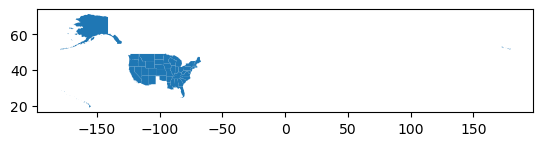

In [147]:
geo_df.plot()

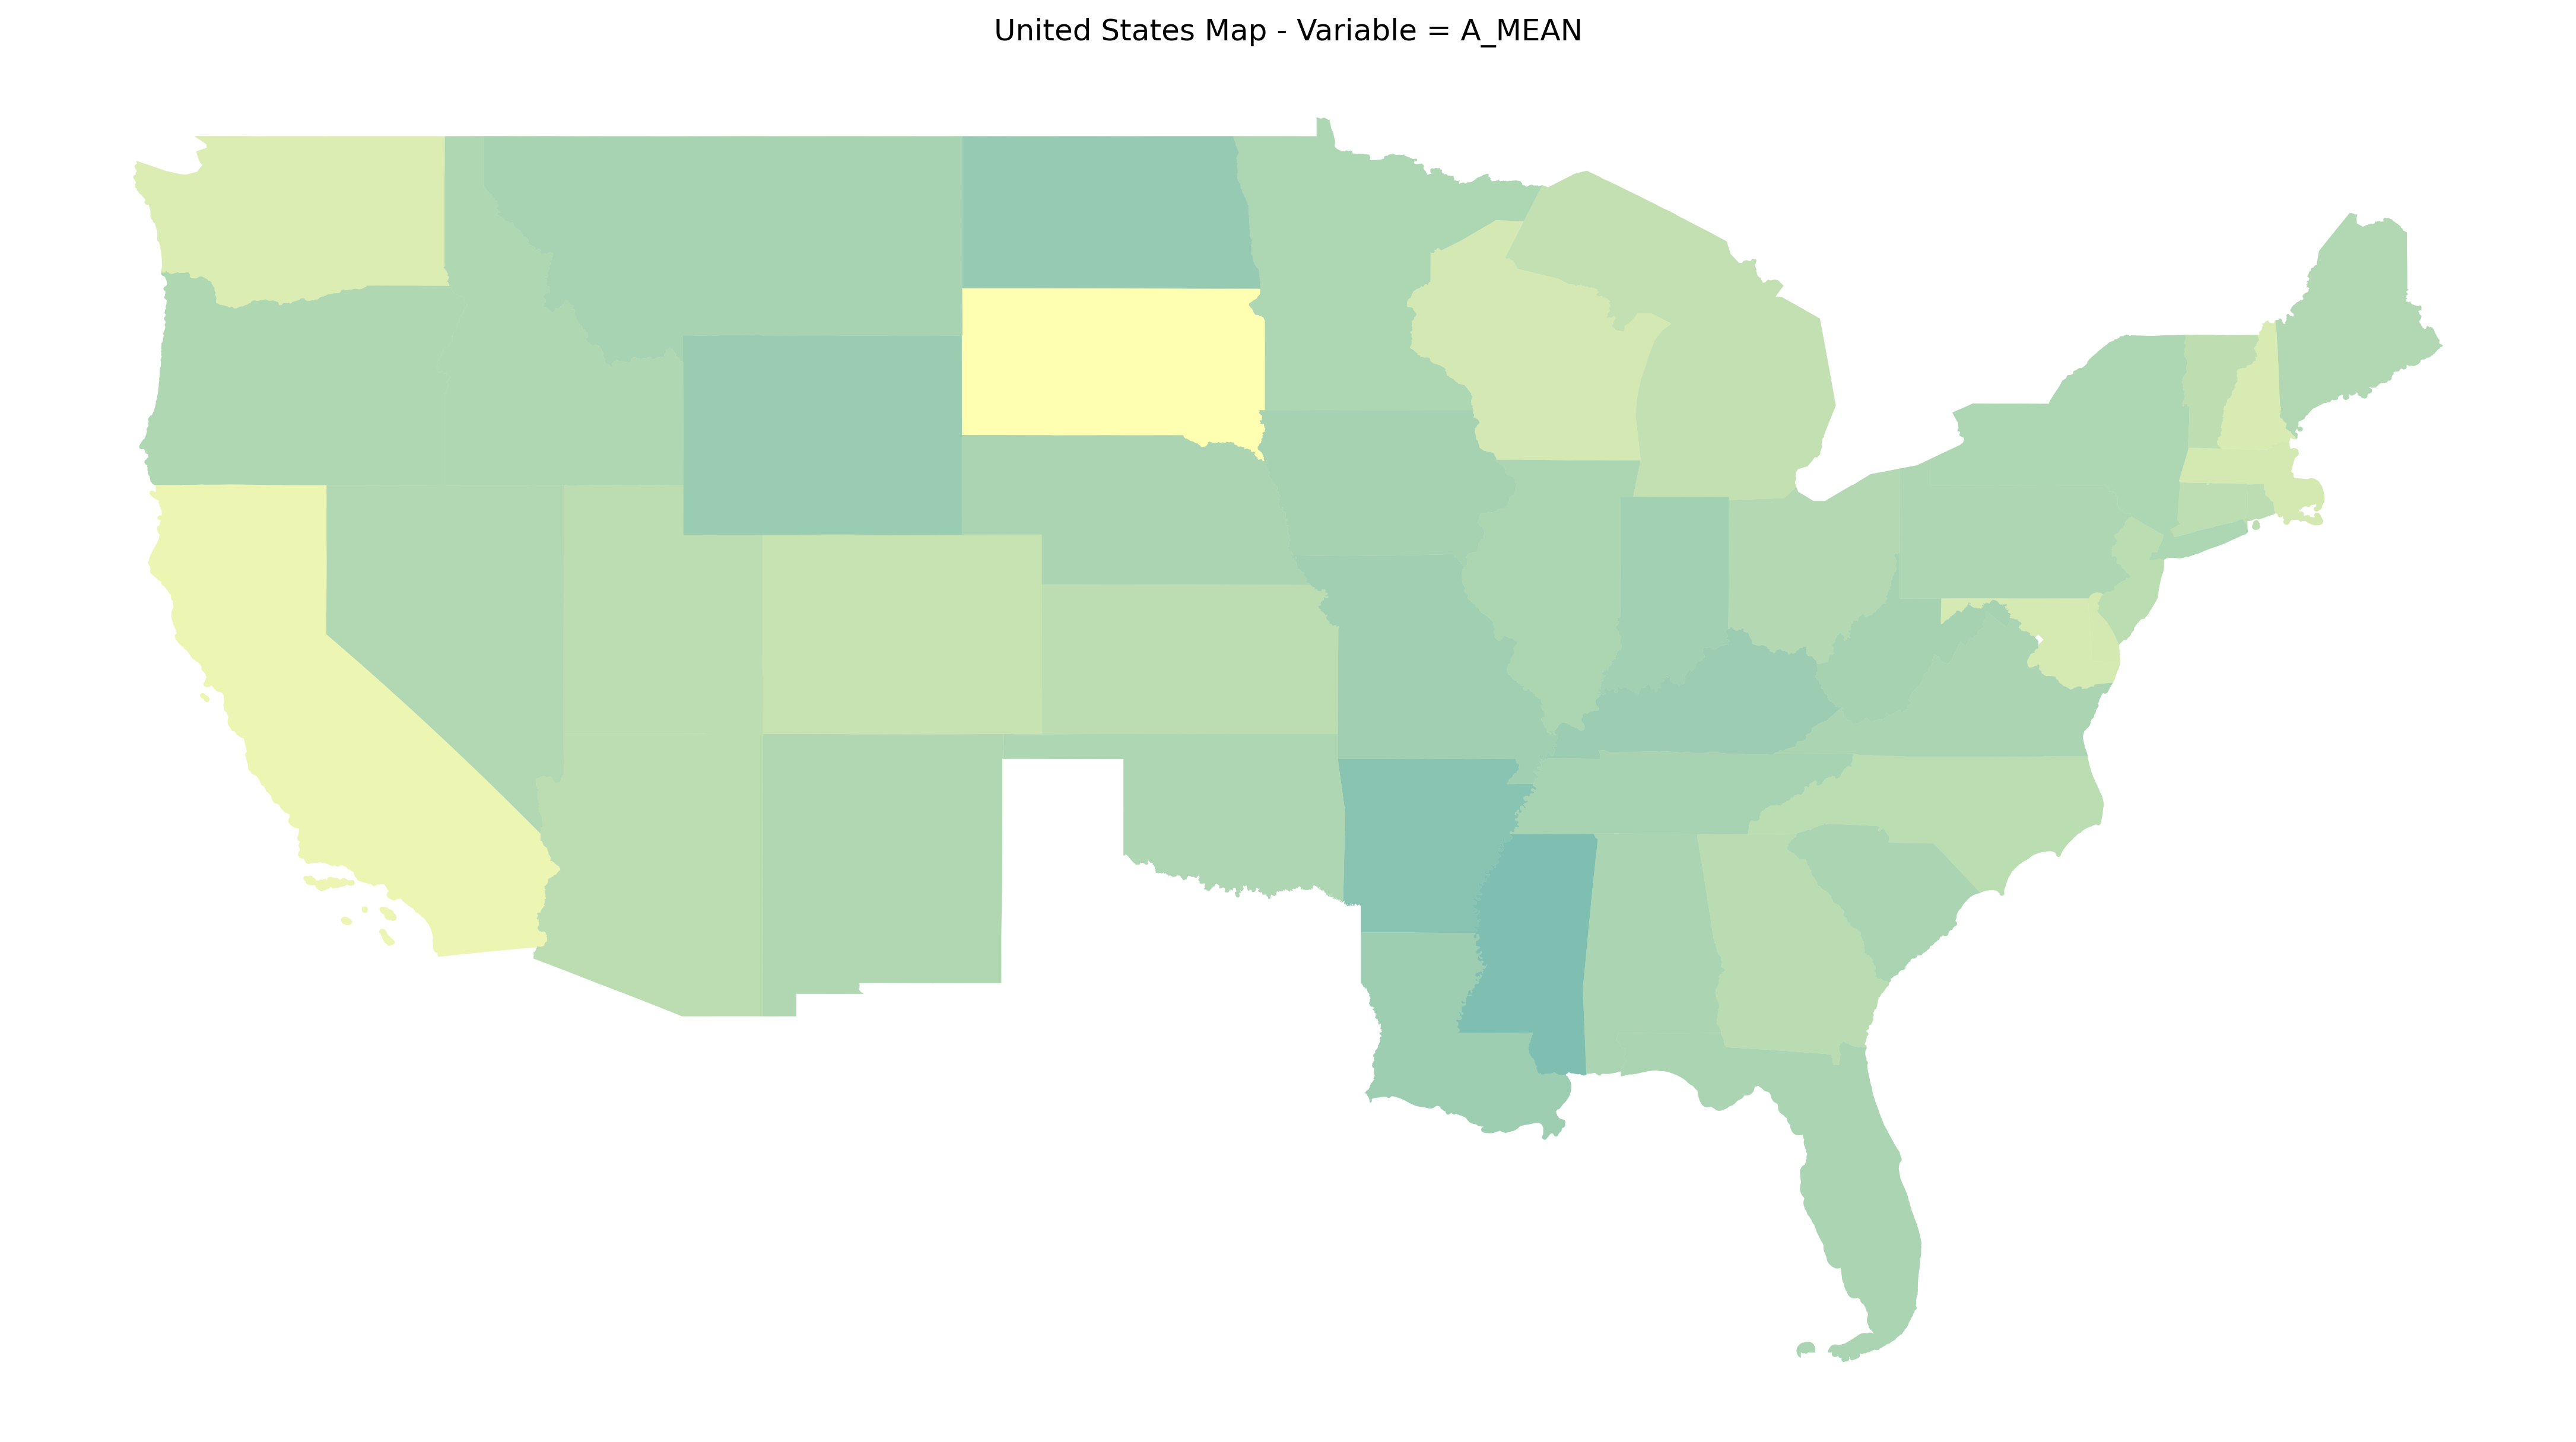

In [148]:
test=geo_df.loc[~geo_df['STATE_NAME'].isin(['Alaska','Hawaii'])]
StatesPlot(test,'A_MEAN','summer')

In [ ]:
geo_df['STATE_NAME'].unique()
aleska and huwai 

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [109]:
us_states.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,0400000US54,WV,West Virginia,00,G4000,A,62266513826,488918898,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,0400000US12,FL,Florida,00,G4000,A,138965379385,45968913048,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,0400000US17,IL,Illinois,00,G4000,A,143778206717,6216848695,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,0400000US27,MN,Minnesota,00,G4000,A,206244791203,18937236061,+46.3159573,-094.1996043,"POLYGON ((-95.31991 48.99892, -95.31778 48.998..."
4,3,5,24,01714934,24,0400000US24,MD,Maryland,00,G4000,A,25151223822,6979843236,+38.9466584,-076.6744939,"POLYGON ((-75.756 39.24607, -75.75578 39.24334..."


In [107]:
state_emp.head()

STATE_ABBR  AGE  EDUCATION_LABEL  OCC_TITLE                                     
AK          20   No schooling     Construction Managers                             134800.0
            23   Grade 5 to 8     Dental Hygienists                                 115665.0
                                  General And Operations Managers                   118872.5
            25   Grade 9          Electrical Power-Line Installers And Repairers    102090.0
                 No schooling     Civil Engineers                                   110635.0
Name: A_MEAN, dtype: float64